In [250]:
pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [251]:
import pyforest
dir(pyforest)


['ARIMA',
 'CountVectorizer',
 'ElasticNet',
 'ElasticNetCV',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'GridSearchCV',
 'Image',
 'KFold',
 'KMeans',
 'LabelEncoder',
 'Lasso',
 'LassoCV',
 'LazyImport',
 'LinearRegression',
 'LogisticRegression',
 'MinMaxScaler',
 'OneHotEncoder',
 'PCA',
 'Path',
 'PolynomialFeatures',
 'Prophet',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomizedSearchCV',
 'Ridge',
 'RidgeCV',
 'RobustScaler',
 'SimpleImputer',
 'SparkContext',
 'StandardScaler',
 'StratifiedKFold',
 'TSNE',
 'TfidfVectorizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_importable',
 '_imports',
 '_jupyter_labextension_paths',
 '_jupyter_nbextension_paths',
 'active_imports',
 'alt',
 'bokeh',
 'cross_val_score',
 'cv2',
 'dash',
 'dd',
 'dt',
 'fastai',
 'fbprophet',
 'gensim',
 'get_user_symbols',
 'glob',
 'go',
 'import_symbol',
 'imutils',


In [252]:
df = pd.read_csv("/content/Mass Shootings Database.csv")

<IPython.core.display.Javascript object>

In [253]:
df.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Louisville bank shooting,"Louisville, KY",4/10/23,"Connor Sturgeon, 25, opened fire inside Old Na...",5,8,13,workplace,25,yes,...,AR-15 rifle,White,M,https://apnews.com/article/downtown-louisville...,-,-,-,-,Mass,2023
1,Nashville Christian school shooting,"Nashville, TN",3/27/23,"Audrey Hale, 28, who was a former student at t...",6,6,12,School,28,-,...,-,White,"F (""identifies as transgender"" and ""Audrey Hal...",https://www.tennessean.com/story/news/crime/20...,-,-,-,-,Mass,2023
2,Michigan State University shooting,"East Lansing, Michigan",2/13/23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,...,-,Black,M,https://www.cnn.com/us/live-news/michigan-stat...,-,-,-,-,Mass,2023
3,Half Moon Bay spree shooting,"Half Moon Bay, California",1/23/23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,-,...,-,Asian,M,https://www.cnn.com/us/live-news/half-moon-bay...,-,-,-,-,Spree,2023
4,LA dance studio mass shooting,"Monterey Park, California",1/21/23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,yes,...,-,Asian,M,https://www.latimes.com/california/story/2023-...,https://www.latimes.com/california/story/2023-...,-,-,-,Mass,2023


In [254]:
df['City'] = df['location'].str.split(',').str[0]
df['State'] = df['location'].str.split(', ').str[-1]

In [255]:
df = df.drop(['location', 'sources', 'mental_health_sources', 'sources_additional_age',	'latitude',	'longitude' ], axis = 1)

In [256]:
df.head()


,case,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,type,year,City,State
0,Louisville bank shooting,4/10/23,"Connor Sturgeon, 25, opened fire inside Old Na...",5,8,13,workplace,25,yes,-,yes,gun dealership in Louisville,semiautomatic rifle,AR-15 rifle,White,M,Mass,2023,Louisville,KY
1,Nashville Christian school shooting,3/27/23,"Audrey Hale, 28, who was a former student at t...",6,6,12,School,28,-,-,yes,-,"semiautomatic rifle, semiautomatic handgun",-,White,"F (""identifies as transgender"" and ""Audrey Hal...",Mass,2023,Nashville,TN
2,Michigan State University shooting,2/13/23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,-,yes,-,semiautomatic handguns,-,Black,M,Mass,2023,East Lansing,Michigan
3,Half Moon Bay spree shooting,1/23/23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,-,-,-,-,semiautomatic handgun,-,Asian,M,Spree,2023,Half Moon Bay,California
4,LA dance studio mass shooting,1/21/23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,yes,"According to the LA Times, ""Two law enforcemen...",-,-,semiautomatic assault weapon (Details pending),-,Asian,M,Mass,2023,Monterey Park,California


In [257]:
df['State'].value_counts()

California        25
Texas             12
Florida           12
Colorado           8
Washington         7
Pennsylvania       5
Wisconsin          5
New York           5
Illinois           5
Maryland           4
Virginia           4
Michigan           4
Ohio               4
Connecticut        3
Georgia            3
North Carolina     3
Tennessee          2
Oregon             2
South Carolina     2
Nevada             2
Missouri           2
Kentucky           2
Oklahoma           2
Indiana            2
Minnesota          2
Massachusetts      1
Hawaii             1
Mississippi        1
Utah               1
Arkansas           1
Nebraska           1
KY                 1
Arizona            1
D.C.               1
Kansas             1
Lousiana           1
TN                 1
New Jersey         1
Alabama            1
Iowa               1
Name: State, dtype: int64

In [258]:
df.at[0,'State']='Kentucky'
df.at[1,'State']='Tennessee'

In [259]:
df.head()

,case,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,type,year,City,State
0,Louisville bank shooting,4/10/23,"Connor Sturgeon, 25, opened fire inside Old Na...",5,8,13,workplace,25,yes,-,yes,gun dealership in Louisville,semiautomatic rifle,AR-15 rifle,White,M,Mass,2023,Louisville,Kentucky
1,Nashville Christian school shooting,3/27/23,"Audrey Hale, 28, who was a former student at t...",6,6,12,School,28,-,-,yes,-,"semiautomatic rifle, semiautomatic handgun",-,White,"F (""identifies as transgender"" and ""Audrey Hal...",Mass,2023,Nashville,Tennessee
2,Michigan State University shooting,2/13/23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,-,yes,-,semiautomatic handguns,-,Black,M,Mass,2023,East Lansing,Michigan
3,Half Moon Bay spree shooting,1/23/23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,-,-,-,-,semiautomatic handgun,-,Asian,M,Spree,2023,Half Moon Bay,California
4,LA dance studio mass shooting,1/21/23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,yes,"According to the LA Times, ""Two law enforcemen...",-,-,semiautomatic assault weapon (Details pending),-,Asian,M,Mass,2023,Monterey Park,California


In [260]:
df[["month", "day", "year"]] = df["date"].str.split("/", expand = True)
df.head()

,case,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,...,weapon_type,weapon_details,race,gender,type,year,City,State,month,day
0,Louisville bank shooting,4/10/23,"Connor Sturgeon, 25, opened fire inside Old Na...",5,8,13,workplace,25,yes,-,...,semiautomatic rifle,AR-15 rifle,White,M,Mass,23,Louisville,Kentucky,4,10
1,Nashville Christian school shooting,3/27/23,"Audrey Hale, 28, who was a former student at t...",6,6,12,School,28,-,-,...,"semiautomatic rifle, semiautomatic handgun",-,White,"F (""identifies as transgender"" and ""Audrey Hal...",Mass,23,Nashville,Tennessee,3,27
2,Michigan State University shooting,2/13/23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,-,...,semiautomatic handguns,-,Black,M,Mass,23,East Lansing,Michigan,2,13
3,Half Moon Bay spree shooting,1/23/23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,-,-,...,semiautomatic handgun,-,Asian,M,Spree,23,Half Moon Bay,California,1,23
4,LA dance studio mass shooting,1/21/23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,yes,"According to the LA Times, ""Two law enforcemen...",...,semiautomatic assault weapon (Details pending),-,Asian,M,Mass,23,Monterey Park,California,1,21


In [261]:
df = df.drop("date", axis = 1)

In [262]:
df.dtypes

case                                object
summary                             object
fatalities                           int64
injured                             object
total_victims                       object
location.1                          object
age_of_shooter                      object
prior_signs_mental_health_issues    object
mental_health_details               object
weapons_obtained_legally            object
where_obtained                      object
weapon_type                         object
weapon_details                      object
race                                object
gender                              object
type                                object
year                                object
City                                object
State                               object
month                               object
day                                 object
dtype: object

In [263]:
df.columns


Index(['case', 'summary', 'fatalities', 'injured', 'total_victims',
       'location.1', 'age_of_shooter', 'prior_signs_mental_health_issues',
       'mental_health_details', 'weapons_obtained_legally', 'where_obtained',
       'weapon_type', 'weapon_details', 'race', 'gender', 'type', 'year',
       'City', 'State', 'month', 'day'],
      dtype='object')

In [264]:
df.at[13, 'injured'] = 9
df.at[13, 'total_victims'] = 13


In [265]:
df.at[16, 'age_of_shooter'] = 39
df.at[25, 'age_of_shooter'] = 34

In [266]:
columns_to_convert = ['fatalities', 'injured', 'total_victims', 'age_of_shooter']
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [267]:
columns_to_convert = ['case', 'summary','prior_signs_mental_health_issues',
       'mental_health_details', 'weapons_obtained_legally', 'where_obtained',
       'weapon_type', 'weapon_details', 'race', 'gender', 'type']
df[columns_to_convert] = df[columns_to_convert].astype(str)

In [268]:
columns_to_convert = ['year', 'day', 'month']
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [273]:
df['year'].value_counts()

2018    12
2022    12
2017    11
2019    10
2015     7
2012     7
2021     6
2016     6
2023     5
1999     5
2013     5
2009     4
2007     4
1993     4
2014     4
2011     3
2006     3
1998     3
1991     3
2008     3
1984     2
1992     2
2005     2
2020     2
1997     2
1989     2
1986     1
1987     1
1988     1
1990     1
2004     1
1994     1
1995     1
1996     1
2000     1
2001     1
2003     1
2010     1
1982     1
Name: year, dtype: int64

In [270]:
def update_year(df,col):
  mask = (df[col] >= 10) & (df[col] <= 99)
  df.loc[mask, col] += 2000


In [271]:
update_year(df,'year')

In [276]:
df['prior_signs_mental_health_issues'].replace({'yes': 1, "-": 0}, inplace=True)

In [277]:
df.head()

,case,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,...,weapon_type,weapon_details,race,gender,type,year,City,State,month,day
0,Louisville bank shooting,"Connor Sturgeon, 25, opened fire inside Old Na...",5,8,13,workplace,25,1,-,yes,...,semiautomatic rifle,AR-15 rifle,White,M,Mass,2023,Louisville,Kentucky,4,10
1,Nashville Christian school shooting,"Audrey Hale, 28, who was a former student at t...",6,6,12,School,28,0,-,yes,...,"semiautomatic rifle, semiautomatic handgun",-,White,"F (""identifies as transgender"" and ""Audrey Hal...",Mass,2023,Nashville,Tennessee,3,27
2,Michigan State University shooting,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,0,-,yes,...,semiautomatic handguns,-,Black,M,Mass,2023,East Lansing,Michigan,2,13
3,Half Moon Bay spree shooting,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67,0,-,-,...,semiautomatic handgun,-,Asian,M,Spree,2023,Half Moon Bay,California,1,23
4,LA dance studio mass shooting,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,1,"According to the LA Times, ""Two law enforcemen...",-,...,semiautomatic assault weapon (Details pending),-,Asian,M,Mass,2023,Monterey Park,California,1,21


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

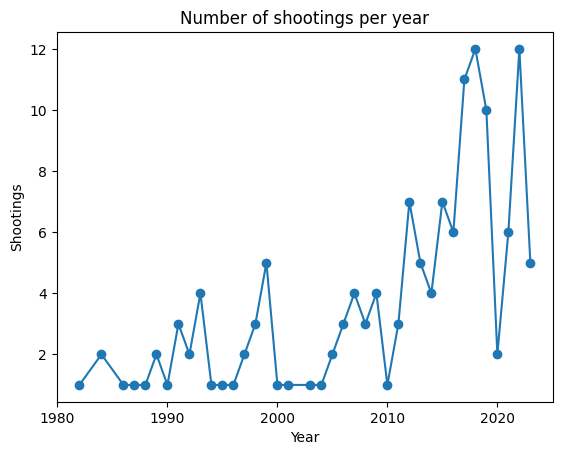

In [281]:
# Get value counts of the column
value_counts_year = df['year'].value_counts()

# Sort value counts by index
value_counts_year = value_counts_year.sort_index()

# Create line graph
plt.plot(value_counts.index, value_counts.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Shootings')
plt.title('Number of shootings per year')
plt.show()








In [283]:
sum_victims_per_year = df.groupby('year')['total_victims'].sum()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

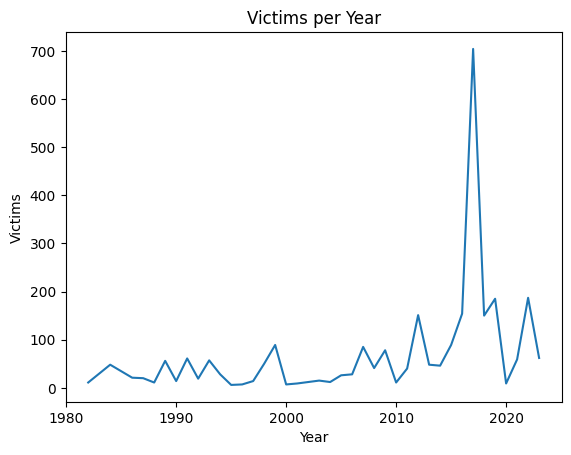

In [284]:
plt.plot(sum_victims_per_year.index, sum_victims_per_year.values)
plt.title('Victims per Year')
plt.xlabel('Year')
plt.ylabel('Victims')
plt.show()

In [286]:
df['State'].value_counts()S

California        25
Texas             12
Florida           12
Colorado           8
Washington         7
Wisconsin          5
Illinois           5
Pennsylvania       5
New York           5
Ohio               4
Michigan           4
Virginia           4
Maryland           4
Connecticut        3
Tennessee          3
Kentucky           3
Georgia            3
North Carolina     3
Missouri           2
Oklahoma           2
Nevada             2
Indiana            2
Oregon             2
South Carolina     2
Minnesota          2
Nebraska           1
Arkansas           1
Hawaii             1
Massachusetts      1
Mississippi        1
Utah               1
D.C.               1
Arizona            1
New Jersey         1
Kansas             1
Lousiana           1
Alabama            1
Iowa               1
Name: State, dtype: int64